#**VBM661 Veri Görselleştirilmesi**  <br>
##Ara Sınav Raporu<br>
---
Ozan KÖYÜK - N20230337  /  ABD’de Bira Üretimi Veri Setinin Analizi<br>

Veri seti kaynağı: https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-03-31 


In [ ]:
!pip install pandas
!pip install plotly-express  # harita giydirmesi için gerekli kütüphane


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px

sns.set_theme(style="darkgrid")

In [2]:
# Veri seti detayları
brewing_materials_csv = "https://github.com/rfordatascience/tidytuesday/raw/master/data/2020/2020-03-31/brewing_materials.csv"
brewing_materials_df = pd.read_csv(brewing_materials_csv)
print(brewing_materials_df.info())
print("-"*75)

beer_states_csv = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv"
beer_states_df = pd.read_csv(beer_states_csv)
print(beer_states_df.info())
print("-"*75)

beer_taxed_csv = "https://github.com/rfordatascience/tidytuesday/raw/master/data/2020/2020-03-31/beer_taxed.csv"
beer_taxed_df = pd.read_csv(beer_taxed_csv)
print(beer_taxed_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_type         1440 non-null   object 
 1   material_type     1440 non-null   object 
 2   year              1440 non-null   int64  
 3   month             1440 non-null   int64  
 4   type              1440 non-null   object 
 5   month_current     1440 non-null   int64  
 6   month_prior_year  1440 non-null   int64  
 7   ytd_current       1008 non-null   float64
 8   ytd_prior_year    1008 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 101.4+ KB
None
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    1872 non-null   object 
 1   year   

In [3]:
# Sorular için ön hazırlık:

csv_file = "https://github.com/rfordatascience/tidytuesday/raw/master/data/2020/2020-03-31/brewing_materials.csv"
df = pd.read_csv(csv_file)
df = df.drop('ytd_current', axis=1)
df = df.drop('ytd_prior_year', axis=1)
df = df.drop('month_prior_year', axis=1)
df = df.dropna()

YEARS_LIST = df.year.unique()
GRAIN_TYPES = df.loc[df['material_type'] == 'Grain Products'].type.unique()
NON_GRAIN_TYPES = df.loc[df['material_type'] == 'Non-Grain Products'].type.unique()

print('YEARS_LIST: ', YEARS_LIST)
print('GRAIN_TYPES: ', GRAIN_TYPES)
print('NON_GRAIN_TYPES: ', NON_GRAIN_TYPES)

YEARS_LIST:  [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
GRAIN_TYPES:  ['Malt and malt products' 'Corn and corn products'
 'Rice and rice products' 'Barley and barley products'
 'Wheat and wheat products']
NON_GRAIN_TYPES:  ['Sugar and syrups' 'Hops (dry)' 'Hops (used as extracts)' 'Other']


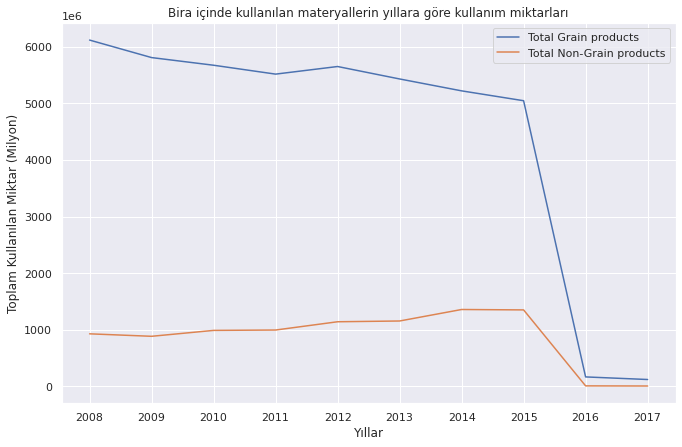

In [4]:
# Veri araştırması

yearly_total = df.loc[df['material_type'].isin(['Total Grain products', 'Total Non-Grain products'])]
yearly_total = yearly_total.groupby(['year', 'material_type']).sum()
yearly_total = yearly_total.drop(['month'], axis=1).reset_index()

total_grain_products = yearly_total.loc[yearly_total['material_type'] == 'Total Grain products']
total_nongrain_products = yearly_total.loc[yearly_total['material_type'] == 'Total Non-Grain products']

plt.xticks(YEARS_LIST)
plt.ticklabel_format(style='sci', scilimits=(6,6), axis='y')

plt.plot(YEARS_LIST, total_grain_products.month_current.to_list(), label = "Total Grain products")
plt.plot(YEARS_LIST, total_nongrain_products.month_current.to_list(), label = "Total Non-Grain products")

plt.title("Bira içinde kullanılan materyallerin yıllara göre kullanım miktarları")
plt.xlabel('Yıllar') 
plt.ylabel('Toplam Kullanılan Miktar (Milyon)') 
plt.legend()

fig = plt.gcf()
fig.set_size_inches(11, 7)

plt.show()

In [5]:
# Soru 1: Toplam üretilen bira miktarlarının eyaletler ile arasındaki ilişki nedir? 
state_csv = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv"

states_df = pd.read_csv(state_csv)
states_df = states_df.drop(['year'], axis=1)
states_df = states_df.groupby(['state']).sum().reset_index()
states_df.drop(states_df.tail(1).index,inplace=True) # drop last n rows

fig = px.choropleth(states_df,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='barrels',
                    color_continuous_scale="Viridis",  range_color=(0, states_df.barrels.max())
)
fig.update_layout(
      title_text = '2008-2019 Arası ABD Eyaletlerinde Üretilen Biraların Varil Sayıları',
      title_font_family="Times New Roman",
      title_font_size = 18,
      title_font_color="black", 
      title_x=0.45,
      width=800,
      height=600,
      coloraxis_colorbar=dict(title="Toplam Varil Sayısı")
)

fig.show()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Varil Miktarı(x1 Milyon)')

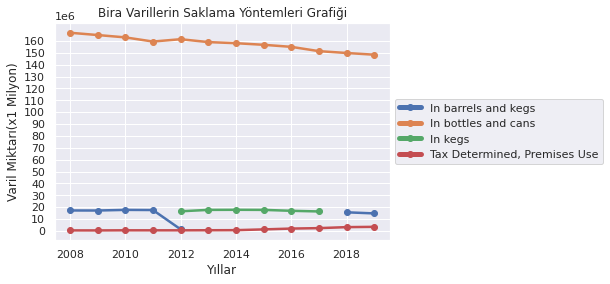

In [6]:
# Soru 2: Bu eyaletlerde üretilen biralar nasıl saklanıyor ve transfer ediliyor?

beer_taxed_csv = "https://github.com/rfordatascience/tidytuesday/raw/master/data/2020/2020-03-31/beer_taxed.csv"
beer_taxed_df = pd.read_csv(beer_taxed_csv)
beer_taxed_df = beer_taxed_df.drop(['data_type','month', 'tax_rate', 'ytd_current', 'ytd_prior_year', 'month_prior_year'], axis=1)

# taxable_df = beer_taxed_df.loc[beer_taxed_df['tax_status'] == 'Taxable']
# tax_free_df = beer_taxed_df.loc[beer_taxed_df['tax_status'] == 'Tax Free']
tax_status_df = beer_taxed_df.loc[beer_taxed_df['tax_status'].isin(['Taxable'])]
tax_status_df.type = pd.Categorical(tax_status_df.type) 
tax_status_df = tax_status_df.groupby(['year', 'type']).sum()
tax_status_df.replace(0, np.nan, inplace=True)
tax_status_df = tax_status_df.reset_index()
# tax_status_df = tax_status_df.groupby(['year', 'type']).sum().reset_index()
# print(tax_status_df)

#sns_plot = sns.lineplot(data=tax_status_df, x="year", y="month_current", hue="type", linewidth=3, marker="o")
#sns_plot.set(xticks=tax_status_df.year.unique())
#sns.set(rc={"figure.figsize":(12, 12)})
for t in tax_status_df.type.unique():
  plt.plot(
      tax_status_df.year.unique(), 
      tax_status_df.loc[tax_status_df['type'] == t]['month_current'].to_list(), 
      'o-',  # marker='o' , line='-'
      label=t, 
      linewidth=2.5
      )

# legend settings
leg = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for l in leg.get_lines():
  l.set_linewidth(5)

# label and tick settings
plt.yticks(np.arange(0, tax_status_df.month_current.max(), 10000000))
plt.ticklabel_format(style='sci', scilimits=(6,6), axis='y')
plt.title("Bira Varillerin Saklama Yöntemleri Grafiği")
plt.xlabel('Yıllar') 
plt.ylabel('Varil Miktarı(x1 Milyon)') 




Text(0, 0.5, 'Toplam Kullanılan Miktar (x1 Milyar Pound)')

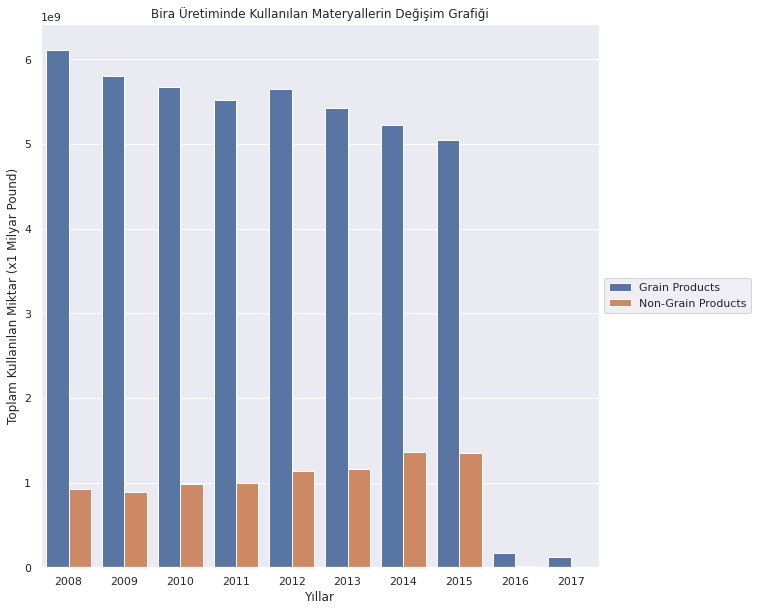

In [7]:
# Soru 3: Üretilen biralarda kullanılan malzemeler hangi türdedir ve ne kadardır?
q3 = df
q3 = q3.groupby(['year', 'material_type']).sum()
q3 = q3.drop(['month'], axis=1).reset_index()
q3 = q3.loc[q3['material_type'].isin(['Grain Products', 'Non-Grain Products'])]

sns.set(rc={"figure.figsize":(10, 10)})
sns.color_palette("rocket", as_cmap=True)

sns.barplot(x='year', y='month_current', hue='material_type', data=q3) 

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Bira Üretiminde Kullanılan Materyallerin Değişim Grafiği")
plt.xlabel('Yıllar') 
plt.ylabel('Toplam Kullanılan Miktar (x1 Milyar Pound)') 


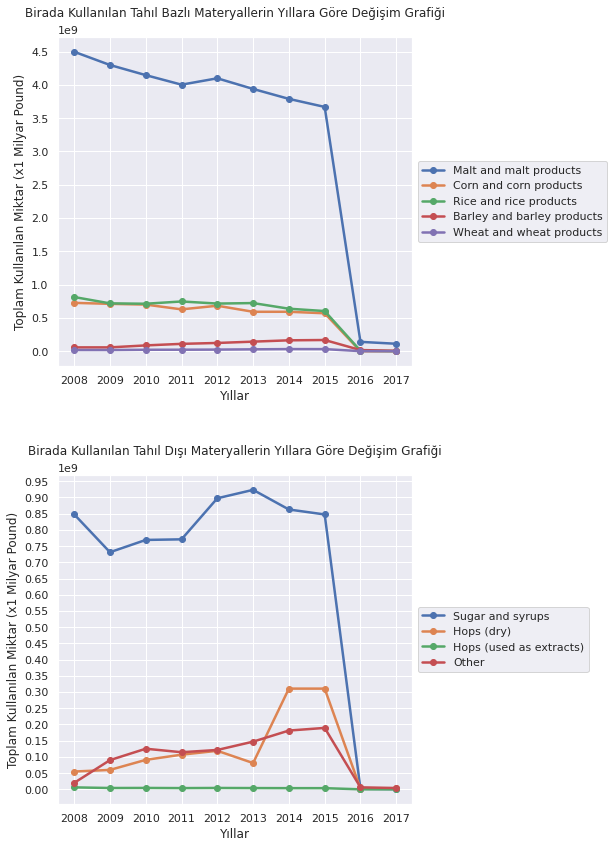

In [8]:
# Soru 4: Bira üretiminde kullanılan malzemeler ve kullanım miktarları nedir?
COLOR_DICT = {}

type_based = df
type_based = type_based.drop(['data_type', 'month'], axis=1)
type_based = type_based.groupby(['year', 'type']).sum().reset_index()

plt.subplot(2, 1, 2)
plt.xticks(YEARS_LIST)
plt.yticks(np.arange(0, type_based.month_current.max(), 50000000))
plt.ticklabel_format(style='sci', scilimits=(9,9), axis='y')
remove_from_list = ['Total Grain products', 'Total Non-Grain products', 'Total Used']
for t in NON_GRAIN_TYPES:
  if t not in remove_from_list:
    _line = plt.plot(
        YEARS_LIST, 
        type_based.loc[type_based['type'] == t]['month_current'].to_list(), 'o-',
        label = t, linewidth=2.5
        )
    COLOR_DICT[t] = _line[0].get_color()

plt.title("Birada Kullanılan Tahıl Dışı Materyallerin Yıllara Göre Değişim Grafiği", pad=20)
plt.xlabel('Yıllar') 
plt.ylabel('Toplam Kullanılan Miktar (x1 Milyar Pound)') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(2, 1, 1)
plt.xticks(YEARS_LIST)
plt.yticks(np.arange(0, type_based.month_current.max(), 500000000))
for t in GRAIN_TYPES:
  if t not in remove_from_list:
    _line = plt.plot(
        YEARS_LIST, 
        type_based.loc[type_based['type'] == t]['month_current'].to_list(),'o-',
        label = t, linewidth=2.5
        )
    COLOR_DICT[t] = _line[0].get_color()

plt.title("Birada Kullanılan Tahıl Bazlı Materyallerin Yıllara Göre Değişim Grafiği", pad=20)
plt.xlabel('Yıllar') 
plt.ylabel('Toplam Kullanılan Miktar (x1 Milyar Pound)') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Figür
fig = plt.gcf()  # get current figure
fig.set_size_inches(10, 15)
fig.tight_layout(pad=5.0)  # padding between subplot
plt.subplots_adjust(top=0.8)  # plot margin

plt.show()

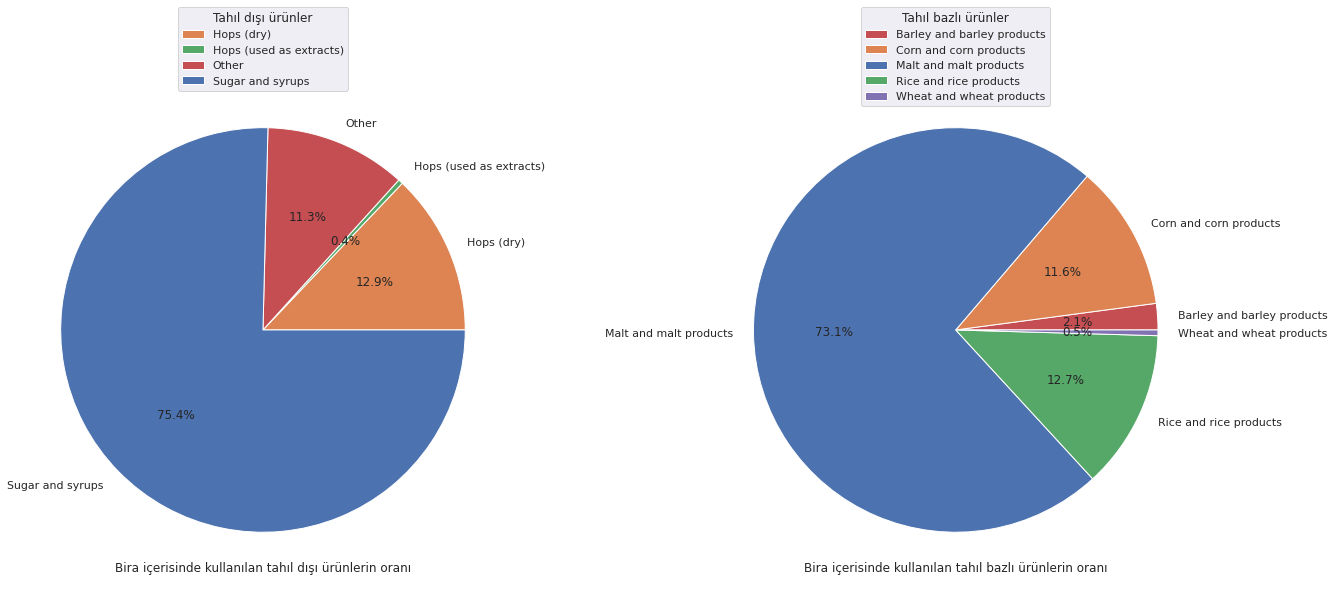

In [9]:
# Veri araştırması
# Tahıl bazlı
grain_df = df.loc[df['type'].isin(GRAIN_TYPES)]
grain_df = grain_df.drop(['year', 'data_type', 'month'], axis=1)
grain_df = grain_df.groupby(['type']).sum().reset_index()
grain_df['percent'] = (grain_df['month_current'] / grain_df['month_current'].sum()) * 100

# Renk ayarları
colors = [COLOR_DICT[g] for g in grain_df.type.to_list()]

plt.subplot(1, 2, 2)
plt.title("Bira içerisinde kullanılan tahıl bazlı ürünlerin oranı", y=0.01)
plt.pie(grain_df.month_current.to_list(), labels = grain_df.type.to_list(), colors=colors, autopct='%1.1f%%',)
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', title='Tahıl bazlı ürünler')

# Tahıl dışı
non_grain_df = df.loc[df['type'].isin(NON_GRAIN_TYPES)]
non_grain_df = non_grain_df.drop(['year', 'data_type', 'month'], axis=1)
non_grain_df = non_grain_df.groupby(['type']).sum().reset_index()
non_grain_df['percent'] = (non_grain_df['month_current'] / non_grain_df['month_current'].sum()) * 100

# Renk ayarları
colors = [COLOR_DICT[g] for g in non_grain_df.type.to_list()]

plt.subplot(1, 2, 1)
plt.title("Bira içerisinde kullanılan tahıl dışı ürünlerin oranı", y=0.01)
plt.pie(non_grain_df.month_current.to_list(), labels = non_grain_df.type.to_list(), colors=colors, autopct='%1.1f%%',)
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', title='Tahıl dışı ürünler')

# Figür
fig = plt.gcf()
fig.set_size_inches(20, 10)
fig.tight_layout(pad=5.0)
plt.show() 
